In [1]:
#import library yang dibutuhkan
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [2]:
#mengimport data 
property_sale = pd.read_csv("nyc-rolling-sales.csv")
property_sale

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
#melihat dimensi data dan tipe dari setiap data
property_sale.shape
property_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
#melihat statistik dari setiap data seperti jumlah, rata-rata, dan lain-lain
property_sale.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [5]:
#menghapus colom yang tidak diperlukan
property_sale.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
property_sale

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [7]:
#membuat colom baru 
property_sale['BOROUGH1']=property_sale.BOROUGH.replace({1 :"Manhattan",2:"Bronx",3:"Brooklyn",4:"Queens",5:"Staten Island"})
property_sale

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH1
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island


# Measure of Central Tendency : Mean

In [8]:
#measure Of central Tendency mean
mean_=property_sale[["TOTAL UNITS","BOROUGH1"]]
mean_
#kesimpulan : rata-rata wilayah 

,TOTAL UNITS,BOROUGH1
0,5,Manhattan
1,31,Manhattan
2,17,Manhattan
3,10,Manhattan
4,6,Manhattan
...,...,...
84543,2,Staten Island
84544,2,Staten Island
84545,2,Staten Island
84546,7,Staten Island


In [9]:
#rata-rata wilayah 
mean_.mean()

TOTAL UNITS    2.249184
dtype: float64

In [10]:
#Kesimpulan : Rata-rata wilayah memiliki 2.249184 unit

# Measure of Central Tendency : Modus

In [11]:
mode_=property_sale[["RESIDENTIAL UNITS","BOROUGH1"]].mode()
mode_

,RESIDENTIAL UNITS,BOROUGH1
0,1,Queens


In [12]:
#jadi unit perumahan yang paling banyak dimiliki yaitu perumahan 1 dan wilayah queens

# Measure of Central Tendency : Median

In [13]:
median_=property_sale.median()
median_

BOROUGH                          3.0
BLOCK                         3311.0
LOT                             50.0
ZIP CODE                     11209.0
RESIDENTIAL UNITS                1.0
COMMERCIAL UNITS                 0.0
TOTAL UNITS                      1.0
YEAR BUILT                    1940.0
TAX CLASS AT TIME OF SALE        2.0
dtype: float64

# Measure of Central Spread : Range

In [14]:
max_=property_sale["TOTAL UNITS"].max()
min_=property_sale["TOTAL UNITS"].min()
print(max_, min_)
print("Range = ",max_ - min_)

2261 0
Range =  2261


# Measure of Central Spread : Variance

In [15]:
var=property_sale["TOTAL UNITS"].var()
var

359.95896003024995

# Measure of Central Spread : Satndard Deviation

In [16]:
stdv1=property_sale["TOTAL UNITS"].std()
stdv2 = var**0.5
print(stdv1, stdv2)

18.972584432023222 18.972584432023222


# Probability Distribution

In [17]:
#normal Distribution
from scipy.stats import norm
normal = property_sale["TOTAL UNITS"].std()
normal = norm.rvs(size=10000, loc=0, scale=1)
normal

array([-1.02067095, -0.54654826, -0.40626859, ..., -0.08361713,
        1.74927821, -1.02512572])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


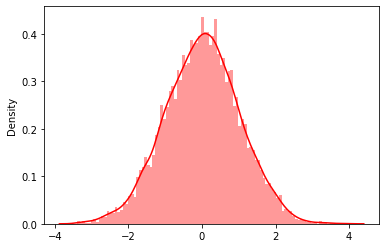

In [18]:
normal_visualisasi= sns.distplot(normal, bins=100, kde=True, color='red')

# Convidance Interval

In [19]:
#menghitung 2 kolom yaitu kolom total units dan borough1
total_units = property_sale[["TOTAL UNITS","BOROUGH1"]]
total_units

,TOTAL UNITS,BOROUGH1
0,5,Manhattan
1,31,Manhattan
2,17,Manhattan
3,10,Manhattan
4,6,Manhattan
...,...,...
84543,2,Staten Island
84544,2,Staten Island
84545,2,Staten Island
84546,7,Staten Island


In [20]:
agregate_total = pd.crosstab(total_units['TOTAL UNITS'],total_units['BOROUGH1'])
agregate_total

BOROUGH1,Bronx,Brooklyn,Manhattan,Queens,Staten Island
TOTAL UNITS,,,,,
0,1460,3704,8085,5954,559
1,2190,9430,8705,12359,5672
2,1949,5913,228,5840,1984
3,820,2720,129,1629,114
4,190,826,128,307,47
...,...,...,...,...,...
902,0,0,1,0,0
955,1,0,0,0,0
1653,0,0,1,0,0


In [23]:
#menghitung jumlah bronx
bronx=total_units["BOROUGH1"]
bronx

0            Manhattan
1            Manhattan
2            Manhattan
3            Manhattan
4            Manhattan
             ...      
84543    Staten Island
84544    Staten Island
84545    Staten Island
84546    Staten Island
84547    Staten Island
Name: BOROUGH1, Length: 84548, dtype: object

In [25]:
property_sale.groupby("BOROUGH1").agg({"chol":[np.mean, np.std, np.size]})

KeyError: "Column 'chol' does not exist!"